<a href="https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb" target="_blank">100 pandas puzzles</a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True

In [125]:
pd.__version__

'0.25.2'

In [126]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.6.9.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.2
numpy            : 1.17.2
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.3.1
setuptools       : 41.6.0.post20191030
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.4.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.9.0
pandas_datareader: 0.8.1
bs4              : 4.8.1
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
mat

In [127]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data=data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [128]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [129]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [130]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [131]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [132]:
df.loc[df['visits'] >= 3]

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


In [133]:
df.loc[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [134]:
df.loc[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [135]:
# df.loc[(df['age'] >= 2) & (df['age'] <= 4)]
df.loc[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [136]:
df.loc['f', 'age'] = 1.5
df.loc['f', 'age']

1.5

In [137]:
df['visits'].sum()

19

In [138]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [139]:
df.loc['k'] =  ['dog', 2, 5.5, 'no']
df.drop('k', inplace=True)

In [140]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [141]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2.0,no
e,dog,5.0,2.0,no
g,snake,4.5,1.0,no
j,dog,3.0,1.0,no
b,cat,3.0,3.0,yes
a,cat,2.5,1.0,yes
f,cat,1.5,3.0,no
c,snake,0.5,2.0,no
h,cat,NaN,1.0,yes
d,dog,NaN,3.0,yes


In [142]:
# df['priority'] = np.where(df['priority'] == 'yes', True, False)
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
a,cat,2.5,1.0,True
b,cat,3.0,3.0,True
c,snake,0.5,2.0,False
d,dog,NaN,3.0,True
e,dog,5.0,2.0,False
f,cat,1.5,3.0,False
g,snake,4.5,1.0,False
h,cat,NaN,1.0,True
i,dog,7.0,2.0,False
j,dog,3.0,1.0,False


In [143]:
df['animal'] = df['animal'].mask(df['animal'] == 'snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1.0,True
b,cat,3.0,3.0,True
c,python,0.5,2.0,False
d,dog,NaN,3.0,True
e,dog,5.0,2.0,False
f,cat,1.5,3.0,False
g,python,4.5,1.0,False
h,cat,NaN,1.0,True
i,dog,7.0,2.0,False
j,dog,3.0,1.0,False


In [144]:
df.pivot_table(values='age', index='animal', columns='visits', aggfunc='mean')

visits,1.0,2.0,3.0
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


In [145]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
# 1, 2, 3, 4, 5, 6, 7
df.where(df != df.shift(periods=1)).dropna()

,A
0,1.0
1,2.0
3,3.0
4,4.0
5,5.0
8,6.0
9,7.0


In [146]:
np.random.seed(0)
df = pd.DataFrame(np.random.random(size=(5, 3)))
# df.apply(lambda x: x - df.mean(axis=1))
df.sub(df.mean(axis=1), axis=0)

,0,1,2
0,-0.073442,0.092934,-0.019492
1,0.006739,-0.114489,0.107750
2,-0.326754,0.127432,0.199322
3,-0.184579,0.223705,-0.039126
4,0.046485,0.404038,-0.450523


In [147]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df)
df.sum(axis=0).idxmax()

          a         b         c         d         e         f         g  \
0  0.087129  0.020218  0.832620  0.778157  0.870012  0.978618  0.799159   
1  0.639921  0.143353  0.944669  0.521848  0.414662  0.264556  0.774234   
2  0.617635  0.612096  0.616934  0.943748  0.681820  0.359508  0.437032   
3  0.670638  0.210383  0.128926  0.315428  0.363711  0.570197  0.438602   
4  0.161310  0.653108  0.253292  0.466311  0.244426  0.158970  0.110375   

          h         i         j  
0  0.461479  0.780529  0.118274  
1  0.456150  0.568434  0.018790  
2  0.697631  0.060225  0.666767  
3  0.988374  0.102045  0.208877  
4  0.656330  0.138183  0.196582  


'h'

In [148]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
df

,0,1,2
0,0,1,1
1,0,0,1
2,0,0,0
3,0,1,1
4,0,0,1
5,0,1,1
6,1,1,0
7,0,0,1
8,0,1,1
9,1,0,1


In [149]:
print(df.duplicated().sum())
df.loc[df.duplicated()]

5


,0,1,2
3,0,1,1
4,0,0,1
5,0,1,1
7,0,0,1
8,0,1,1


In [150]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)
df
# You should return a Series of column labels: e, c, d, h, d

print(df)

# def third_nan(s, n):
#     x = np.where(np.isnan(s))[0][n]
#     return s.index[x]

# df.apply(third_nan, args=(2,), axis=1)

(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

      a   b     c     d     e     f     g     h     i     j
0  0.04 NaN   NaN  0.25   NaN  0.43  0.71  0.51   NaN   NaN
1   NaN NaN   NaN  0.04  0.76   NaN   NaN  0.67  0.76  0.16
2   NaN NaN  0.50   NaN  0.31  0.40   NaN   NaN  0.24  0.01
3  0.49 NaN   NaN  0.62  0.73  0.26  0.85   NaN   NaN   NaN
4   NaN NaN  0.41   NaN  0.05   NaN  0.61   NaN  0.48  0.68


0    e
1    c
2    d
3    h
4    d
dtype: object

In [151]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df.groupby('grps').max()

,vals
grps,
a,345
b,57
c,235


In [152]:
df = pd.DataFrame(np.random.RandomState(0).randint(1, 101, size=(100, 2)), columns=['A', 'B'])
df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

A
(0, 10]      693
(10, 20]     562
(20, 30]     558
(30, 40]     438
(40, 50]     956
(50, 60]     247
(60, 70]     631
(70, 80]     527
(80, 90]     464
(90, 100]    104
Name: B, dtype: int32

In [153]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
# [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
df

,X
0,7
1,2
2,0
3,3
4,4
5,2
6,5
7,0
8,3
9,4


In [154]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))
# [(5, 7), (6, 4), (2, 5)] 大きい値の上位3つの座標
print('df:\n', df)

idx = list(zip(*np.where(df == np.max(df))))
idx_data = [df.iloc[i, j] for i, j in list(zip(*np.where(df == np.max(df))))]

df_max = pd.DataFrame({'maxvalues': idx_data,
                       'idx': idx})
n = 3
df_max.sort_values(by='maxvalues', ascending=False).head(n)['idx'].tolist()

df:
     0   1   2   3   4   5   6   7
0  38  38  46  46  13  24   3  54
1  18  47   4  42   8  66  50  46
2  62  36  19  19  77  17   7  63
3  28  47  46  65  63  12  16  24
4  14  51  34  56  29  59  92  79
5  58  76  96  45  38  76  58  40
6  10  34  48  40  37  23  41  26
7  55  70  91  27  79  92  20  31


[(5, 2), (4, 6), (7, 5)]

In [155]:
df.unstack().sort_values()[-3:].index.tolist()

[(5, 7), (6, 4), (2, 5)]

In [156]:
# grpsごとで、マイナスの場合はグループ平均をpatched_vals列に挿入
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})

def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df['patched_vals'] = df.groupby('grps')['vals'].transform(replace)
df

,vals,grps,patched_vals
0,-12,A,13.6
1,-7,B,28.0
2,-14,A,13.6
3,4,A,4.0
4,-7,A,13.6
5,28,B,28.0
6,-2,A,13.6
7,-1,A,13.6
8,8,A,8.0
9,-2,B,28.0


In [157]:
# groupごとの窓関数（シフト値：3）の平均を計算する。ただしNaNは無視する
df = pd.DataFrame({'group': list('aabbabbbabab'),
                   'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})

g1 = df.groupby('group')['value']
g2 = df.fillna(0).groupby('group')['value']

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

In [158]:
idx = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')
d = np.random.RandomState(0).randint(0, len(idx), size=len(idx))
s = pd.Series(data=d, index=idx)
s

2015-01-01    172
2015-01-02     47
2015-01-05    117
2015-01-06    192
2015-01-07    251
             ... 
2015-12-25     51
2015-12-28    158
2015-12-29     53
2015-12-30     94
2015-12-31     59
Freq: B, Length: 261, dtype: int32

In [159]:
s[s.index.weekday == 2].sum()

6416

In [160]:
s.resample('M').mean()

2015-01-31    131.000000
2015-02-28    135.150000
2015-03-31    127.181818
2015-04-30    117.272727
2015-05-31    113.523810
2015-06-30    134.136364
2015-07-31    154.304348
2015-08-31    119.428571
2015-09-30    153.590909
2015-10-31    113.636364
2015-11-30    114.142857
2015-12-31    125.826087
Freq: M, dtype: float64

In [161]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-07
2015-05-31   2015-05-18
2015-09-30   2015-06-11
2016-01-31   2015-12-15
Freq: 4M, dtype: datetime64[ns]

In [162]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [163]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [164]:
# FlightNumber列に10055と10075を配置する
# これらの欠落している数値を埋めるようにdfを変更し、列を（float列ではなく）integer列にします。
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [165]:
temp = pd.DataFrame(df['From_To'].str.split('_').tolist(), columns=['From', 'To'])
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [166]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [167]:
# pd.merge(df, temp, left_index=True, right_index=True)[['From', 'To', 'FlightNumber', 'RecentDelays', 'Airline']]
df.drop('From_To', axis=1, inplace=True)
df = df.join(temp)

In [168]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False)#.str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [169]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(i+1) for i in delays.columns]
df = df.join(delays).drop('RecentDelays', axis=1)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [170]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

count = len(letters)*len(numbers)
data = np.random.RandomState(0).randint(0, count, size=count)

index = pd.MultiIndex.from_product(iterables=[letters, numbers], names=['letters', 'numbers'])
s = pd.Series(data=data, index=index)
s

letters  numbers
A        0          12
         1          15
         2          21
         3           0
         4           3
         5          27
         6           3
         7           7
         8           9
         9          19
B        0          21
         1          18
         2           4
         3          23
         4           6
         5          24
         6          24
         7          12
         8          26
         9           1
C        0           6
         1           7
         2          23
         3          14
         4          24
         5          17
         6           5
         7          25
         8          13
         9           8
dtype: int32

In [171]:
s.index.is_lexsorted()

True

In [172]:
s.loc[:, [1, 3, 6]]

letters  numbers
A        1          15
         3           0
         6           3
B        1          18
         3          23
         6          24
C        1           7
         3          14
         6           5
dtype: int32

In [173]:
# s.loc[:'B', 5:]
s.loc[pd.IndexSlice[:'B', 5:]]

letters  numbers
A        5          27
         6           3
         7           7
         8           9
         9          19
B        5          24
         6          24
         7          12
         8          26
         9           1
dtype: int32

In [174]:
s.sum(level='letters')

letters
A    116
B    159
C    142
dtype: int32

In [175]:
# s.reset_index().groupby('letters')[0].sum()
s.unstack().sum(axis=1)

letters
A    116
B    159
C    142
dtype: int64

In [176]:
s.swaplevel(0, 1).sort_index(level=0)

numbers  letters
0        A          12
         B          21
         C           6
1        A          15
         B          18
         C           7
2        A          21
         B           4
         C          23
3        A           0
         B          23
         C          14
4        A           3
         B           6
         C          24
5        A          27
         B          24
         C          17
6        A           3
         B          24
         C           5
7        A           7
         B          12
         C          25
8        A           9
         B          26
         C          13
9        A          19
         B           1
         C           8
dtype: int32

In [177]:
X = 5
Y = 4
p = pd.core.reshape.util.cartesian_product([np.arange(X), np.arange(Y)])
df = pd.DataFrame(np.array(p).T, columns=['X', 'Y'])

In [178]:
# probability = np.random.RandomState(0).random(size=len(df))
# df['mine'] = np.where(probability < 0.4 , 1, 0)
df['mine'] = np.random.binomial(1, 0.4, X*Y)
df

,X,Y,mine
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,1
4,1,0,0
5,1,1,0
6,1,2,0
7,1,3,0
8,2,0,0
9,2,1,1


In [179]:
df['adjacent'] = \
    df.merge(df + [ 1,  1, 0], on=['X', 'Y'], how='left')\
      .merge(df + [ 1, -1, 0], on=['X', 'Y'], how='left')\
      .merge(df + [-1,  1, 0], on=['X', 'Y'], how='left')\
      .merge(df + [-1, -1, 0], on=['X', 'Y'], how='left')\
      .merge(df + [ 1,  0, 0], on=['X', 'Y'], how='left')\
      .merge(df + [-1,  0, 0], on=['X', 'Y'], how='left')\
      .merge(df + [ 0,  1, 0], on=['X', 'Y'], how='left')\
      .merge(df + [ 0, -1, 0], on=['X', 'Y'], how='left')\
       .iloc[:, 3:]\
        .sum(axis=1)

df

,X,Y,mine,adjacent
0,0,0,0,0.0
1,0,1,0,0.0
2,0,2,0,1.0
3,0,3,1,0.0
4,1,0,0,1.0
5,1,1,0,1.0
6,1,2,0,3.0
7,1,3,0,2.0
8,2,0,0,2.0
9,2,1,1,1.0


In [185]:
df['adjacent'] = np.where(df['mine'] >= 1, np.nan, df['adjacent'])
df

,X,Y,mine,adjacent
0,0,0,0,0.0
1,0,1,0,0.0
2,0,2,0,1.0
3,0,3,1,NaN
4,1,0,0,1.0
5,1,1,0,1.0
6,1,2,0,3.0
7,1,3,0,2.0
8,2,0,0,2.0
9,2,1,1,NaN


In [189]:
df.pivot_table('adjacent', index='Y', columns='X', aggfunc='sum')

X,0,1,2,3,4
Y,,,,,
0,0.0,1.0,2.0,2.0,1.0
1,0.0,1.0,0.0,0.0,2.0
2,1.0,3.0,3.0,4.0,0.0
3,0.0,2.0,0.0,2.0,1.0


In [2]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


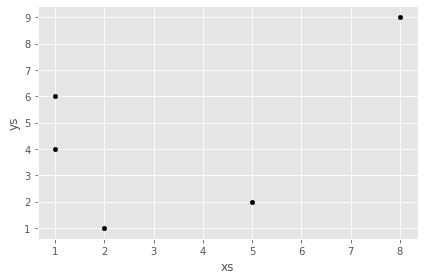

In [7]:
df.plot.scatter(color='k', x='xs', y='ys');

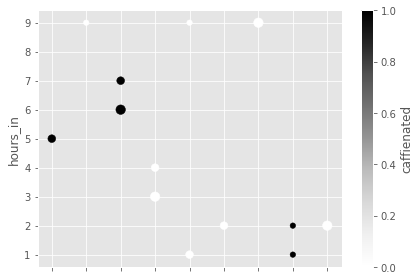

In [11]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
df.plot.scatter(x='productivity', y='hours_in', s=df['happiness']*30, c='caffienated');

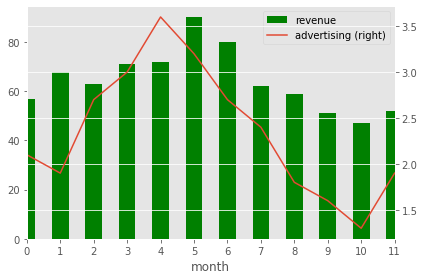

In [25]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
ax = df.plot.bar(x='month', y='revenue', color='g')
df.plot.line(x='month', y='advertising', secondary_y=True, ax=ax)
ax.set_xlim(df.month.min(), df.month.max());

In [26]:
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

In [41]:
df = day_stock_data()
df

,time,price
0,2020-06-09 09:30:00,100.000000
1,2020-06-09 09:30:02,100.057691
2,2020-06-09 09:30:03,99.994942
3,2020-06-09 09:30:03,99.907410
4,2020-06-09 09:30:06,99.993299
...,...,...
6457,2020-06-09 15:59:44,100.890637
6458,2020-06-09 15:59:48,100.962420
6459,2020-06-09 15:59:55,100.935218
6460,2020-06-09 15:59:57,101.019988


In [54]:
df.describe()

,price
count,6462.000000
mean,100.884270
std,1.838911
min,97.966999
25%,99.244488
50%,100.392117
75%,102.753575
max,104.437548


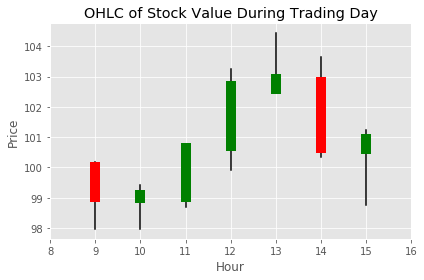

In [130]:
# ["open","high","low","close","color"]
def _open(d):
    return d.iloc[0]
def _close(d):
    return d.iloc[-1]

df_timegroup = df.set_index('time').resample('H').agg([_open, _close, 'max', 'min'])
df_timegroup.columns = df_timegroup.columns.droplevel()
df_timegroup['bar_color'] = df_timegroup.apply(lambda x: 'green' if x['_close']>x['_open'] else 'red',\
                                               axis=1)
df_timegroup.rename(columns={'_open': 'open', 'max': 'high', 'min': 'low',\
                             '_close': 'close', 'bar_color': 'color'}, inplace=True)
df_timegroup = df_timegroup[['open', 'high', 'low', 'close', 'color']]
plot_candlestick(df_timegroup)